In [1]:
import acquire as acq
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

Load In successful, awaiting commands...
Load In successful, awaiting commands...


> # Part A

>> ### Acquire

Using the titanic data:

In [2]:
df = acq.get_titanic_data()
df.head()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


>> ### Prepare

In [3]:
dft = prep.clean_titanic(df)

In [4]:
dft = dft[['passenger_id',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'fare',
 'embark_town',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']]

### removed the sex column for the model as it is redundant

need to take out the embark_town column as well as it is already encoded and i remember the names

In [5]:
dft.head()

,passenger_id,survived,pclass,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,0,0,8.0500,Southampton,1,1,0,1


In [6]:
df = dft[['passenger_id',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']]

In [7]:
df.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1


Now to split the data into train, validate, and test.

Target variable identified as 'survived'

In [8]:
train, validate, test = prep.split_titanic(df)

In [9]:
#confimed sample sizes are 60/20/20
train.shape, validate.shape, test.shape

((534, 10), (178, 10), (179, 10))

In [10]:
# ONLY LOOKING AT TRAIN
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


>> ### Explore

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [11]:
train.survived.value_counts()
# did not survive has higher counts = baseline prediction
train['baseline'] = 0

In [12]:
train.head() # checking to make sure baseline column was made

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
455,455,1,3,0,0,7.8958,1,1,0,0,0
380,380,1,1,0,0,227.5250,1,0,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1,0
55,55,1,1,0,0,35.5000,1,1,0,1,0
243,243,0,3,0,0,7.1250,1,1,0,1,0


In [13]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [14]:
# establishing baseline accuracy
baseline_accuracy = round((329/(205+329)*100),2)
baseline_accuracy

61.61

In [15]:
# drop columns not needed or not encoded
train = train.drop(columns=['passenger_id', 'baseline'])

In [16]:
# I am trying to find the most significant categorical variables to send in

col_cat = []  #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns:
    print(col)#this is for my numeric variables
    if len(train[col].unique()) < 3: # making anything with less than 3 unique variables a categorical
        col_cat.append(col)
    else:
        col_num.append(col)

survived
pclass
sibsp
parch
fare
alone
sex_male
embark_town_Queenstown
embark_town_Southampton


In [17]:
col_cat

['survived',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [18]:
col_num

['pclass', 'sibsp', 'parch', 'fare']

## `Exploring Categoricals`


SURVIVED
0    329
1    205
Name: survived, dtype: int64
0    0.616105
1    0.383895
Name: survived, dtype: float64


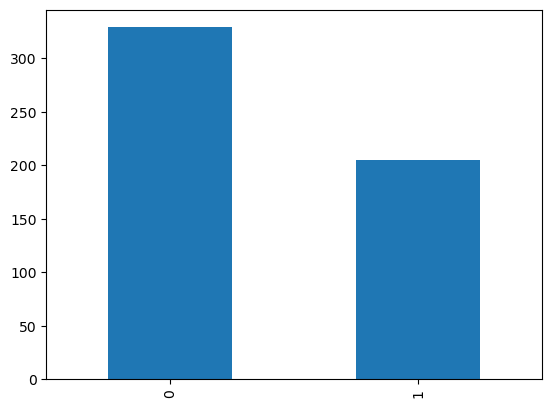



HYPOTHESIZE
H_0: survived does not affect survival
H_a: survived affects survival

VISUALIZE


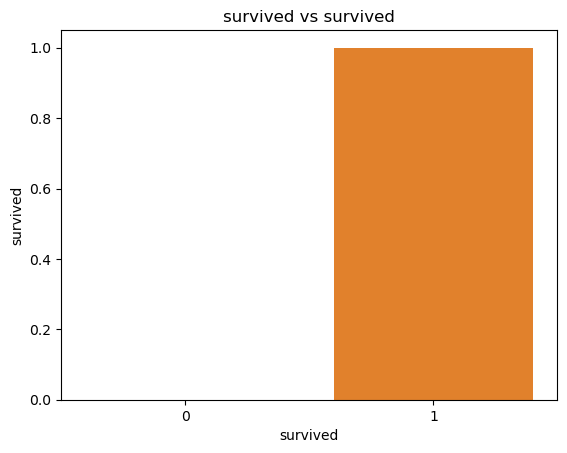


ANALYZE and SUMMARIZE
Observed
[[329   0]
 [  0 205]]

Expected
[[202 126]
 [126  78]]

----
chi^2 = 529.7804
p-value = 0.0000
----
We reject the null hypothesis.



ALONE
1    335
0    199
Name: alone, dtype: int64
1    0.627341
0    0.372659
Name: alone, dtype: float64


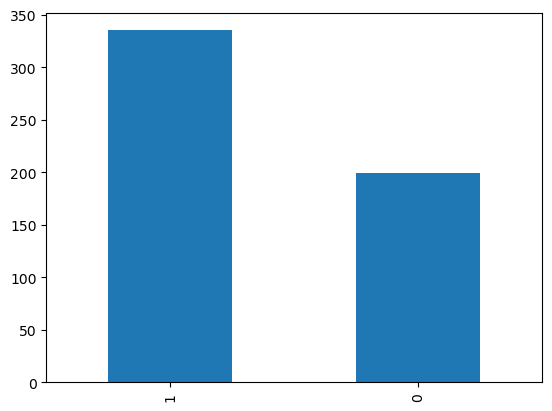



HYPOTHESIZE
H_0: alone does not affect survival
H_a: alone affects survival

VISUALIZE


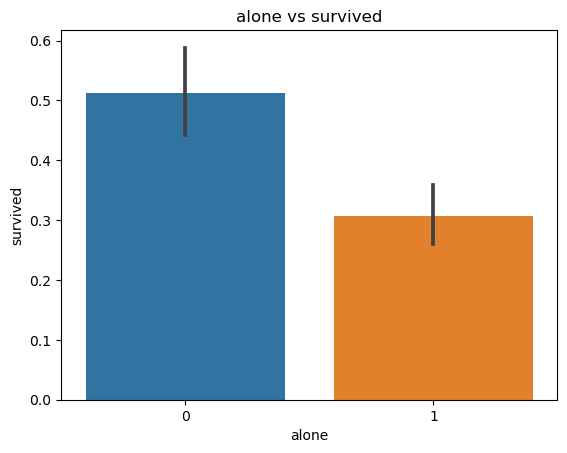


ANALYZE and SUMMARIZE
Observed
[[ 97 102]
 [232 103]]

Expected
[[122  76]
 [206 128]]

----
chi^2 = 21.3448
p-value = 0.0000
----
We reject the null hypothesis.



SEX_MALE
1    348
0    186
Name: sex_male, dtype: int64
1    0.651685
0    0.348315
Name: sex_male, dtype: float64


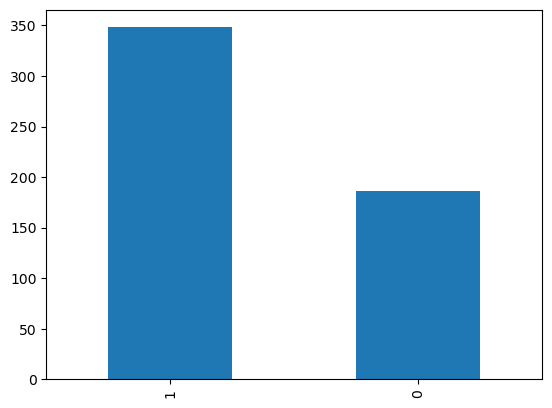



HYPOTHESIZE
H_0: sex male does not affect survival
H_a: sex male affects survival

VISUALIZE


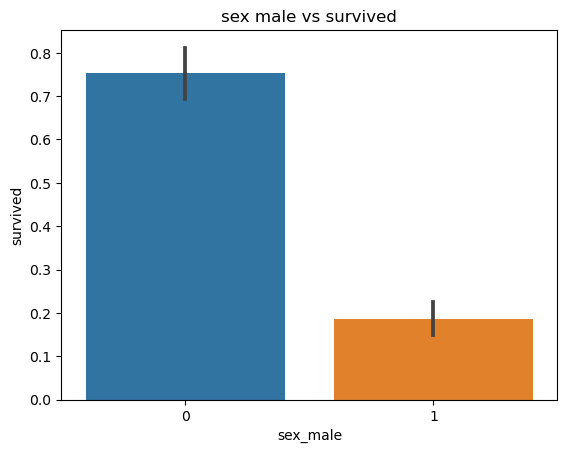


ANALYZE and SUMMARIZE
Observed
[[ 46 140]
 [283  65]]

Expected
[[114  71]
 [214 133]]

----
chi^2 = 161.7405
p-value = 0.0000
----
We reject the null hypothesis.



EMBARK_TOWN_QUEENSTOWN
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    0.913858
1    0.086142
Name: embark_town_Queenstown, dtype: float64


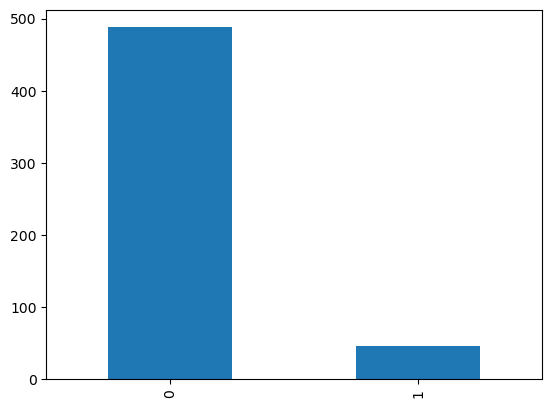



HYPOTHESIZE
H_0: embark town queenstown does not affect survival
H_a: embark town queenstown affects survival

VISUALIZE


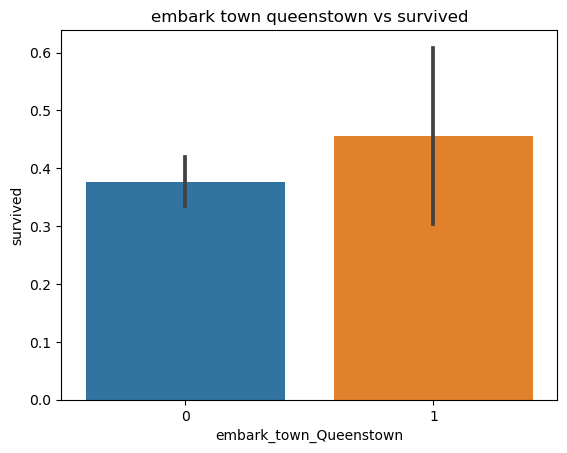


ANALYZE and SUMMARIZE
Observed
[[304 184]
 [ 25  21]]

Expected
[[300 187]
 [ 28  17]]

----
chi^2 = 0.8117
p-value = 0.3676
----
We fail to reject the null hypothesis.



EMBARK_TOWN_SOUTHAMPTON
1    381
0    153
Name: embark_town_Southampton, dtype: int64
1    0.713483
0    0.286517
Name: embark_town_Southampton, dtype: float64


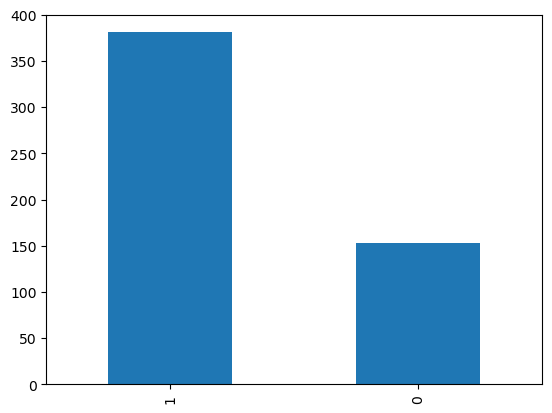



HYPOTHESIZE
H_0: embark town southampton does not affect survival
H_a: embark town southampton affects survival

VISUALIZE


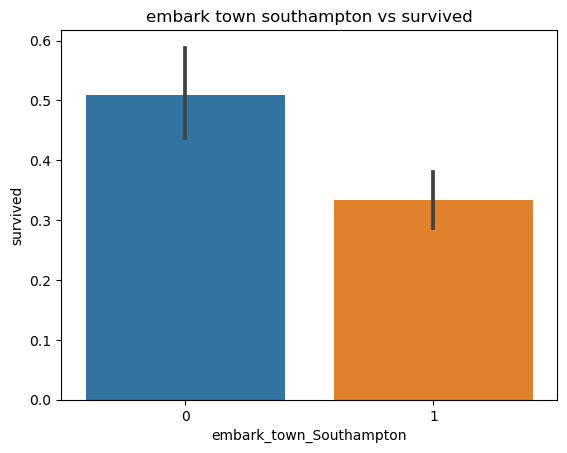


ANALYZE and SUMMARIZE
Observed
[[ 75  78]
 [254 127]]

Expected
[[ 94  58]
 [234 146]]

----
chi^2 = 13.6367
p-value = 0.0002
----
We reject the null hypothesis.




In [19]:
for col in col_cat:
    print()
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True))
    train[col].value_counts().plot.bar()
    plt.show()
    print()
    print()
    print(f'HYPOTHESIZE')
    print(f"H_0: {col.lower().replace('_',' ')} does not affect survival")
    print(f"H_a: {col.lower().replace('_',' ')} affects survival")
    print()
    print(f'VISUALIZE')
    sns.barplot(x=train[col], y=train['survived'])
    plt.title(f"{col.lower().replace('_',' ')} vs survived")
    plt.show()
    print()
    print('ANALYZE and SUMMARIZE')
    observed = pd.crosstab(train[col], train.survived)
    acq.chi2_test(observed)
    print()
    print()

## `Exploring Numericals`

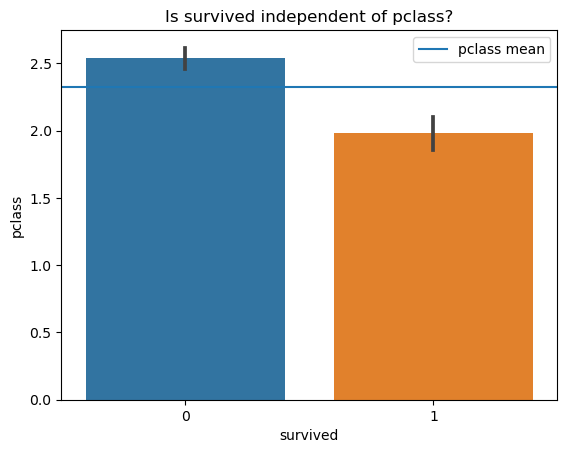

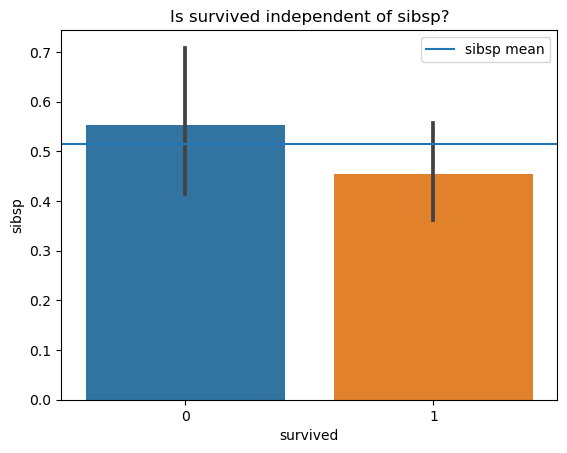

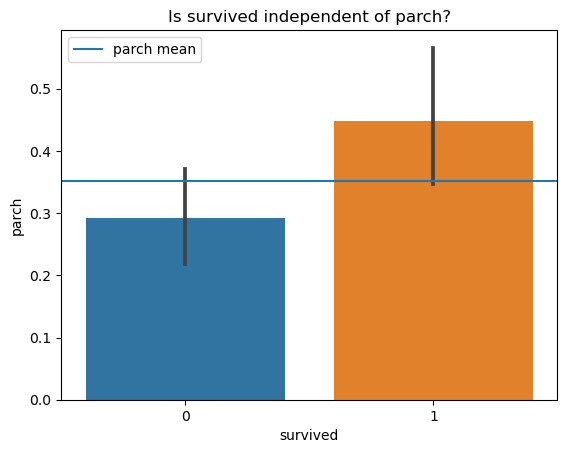

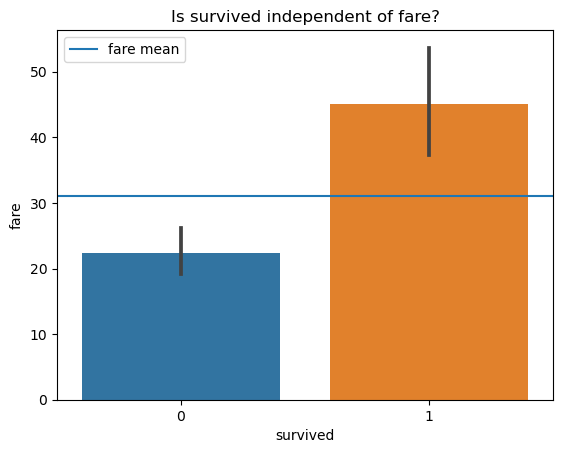

In [20]:
for col in col_num:
    sns.barplot(data=train, x='survived', y=col)
    plt.title(f"Is survived independent of {col.lower().replace('_',' ')}?")
    pop_mn = train[col].mean()
    plt.axhline(pop_mn, label=(f"{col.lower().replace('_',' ')} mean"))
    plt.legend()
    plt.show()
    print()

## `Takeaways`

Categorical Takeaways: 

* significant:
    * gender, alone

* not significant:
    * embark_town (more people survived who got on at Queenstown than at Southampton)

Numerical Takeaways:

* significant:
    * pclass, parch, fare

* not significant:
    * passenger id, sibsp

## `Selecting ALL Features`

In [21]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [22]:
# setting features
X_train = train[['pclass',
                 'sibsp',
                 'parch',
                 'fare',
                 'alone',
                 'sex_male',
                 'embark_town_Queenstown',
                 'embark_town_Southampton'
]]
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [23]:
# setting validate and test features
X_validate = validate[['pclass',
                   'sibsp',
                   'parch',
                   'fare',
                   'alone',
                   'sex_male',
                   'embark_town_Queenstown',
                   'embark_town_Southampton'
]]
X_test = test[['pclass',
                   'sibsp',
                   'parch',
                   'fare',
                   'alone',
                   'sex_male',
                   'embark_town_Queenstown',
                   'embark_town_Southampton'
]]

In [24]:
# setting target variable
target = 'survived'

In [25]:
# create variable and verify that it is a series and one column
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [26]:
# create for validate and test
y_validate = validate[target]
y_test = test[target]

## `Make the Object`

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [27]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [28]:
# fitting training data to model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# transforming the model
clf.score(X_train, y_train)

0.9456928838951311

## `Takeaways`

* FISHY...

3. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [30]:
# run classification report and confusion matrix!

In [31]:
#find labels in our dataset & sort
labels = sorted(y_train.unique())
labels

[0, 1]

In [32]:
# get y_pred values
clf.predict(X_train)[:5]

array([0, 1, 0, 1, 0])

In [33]:
# create y_pred variable
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 1, 0, 1, 0])

In [34]:
confusion_matrix(y_train, y_pred)

array([[327,   2],
       [ 27, 178]])

In [35]:
#make pretty with df
pd.DataFrame(confusion_matrix(y_train, y_pred),
            index=labels,
            columns=labels)

,0,1
0,327,2
1,27,178


In [36]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       329
           1       0.99      0.87      0.92       205

    accuracy                           0.95       534
   macro avg       0.96      0.93      0.94       534
weighted avg       0.95      0.95      0.94       534



>>> ## Terrible model...

4. Run through steps 2-4 using a different max_depth value.

## `Takeaways`

Categorical Takeaways: 

* significant:
    * gender, alone

* not significant:
    * embark_town (more people survived who got on at Queenstown than at Southampton)

Numerical Takeaways:

* significant:
    * pclass, parch, fare

* not significant:
    * passenger id, sibsp

In [37]:
X_train.columns.tolist()

['pclass',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [38]:
# model isn't changing from 100% accuracy so I need to eliminate features
# see above takeaways to eliminate
X_train = train[[
 'pclass',
 'parch',
 'fare',
 'alone',
 'sex_male']]

In [39]:
clf2 = DecisionTreeClassifier(max_depth=8)

In [40]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [41]:
clf2.score(X_train, y_train)

0.9044943820224719

#### `Changed from 100% to 82%!!!! model 2 is looking promising`

5. Which model performs better on your in-sample data?

    * model 2 (clf2!)

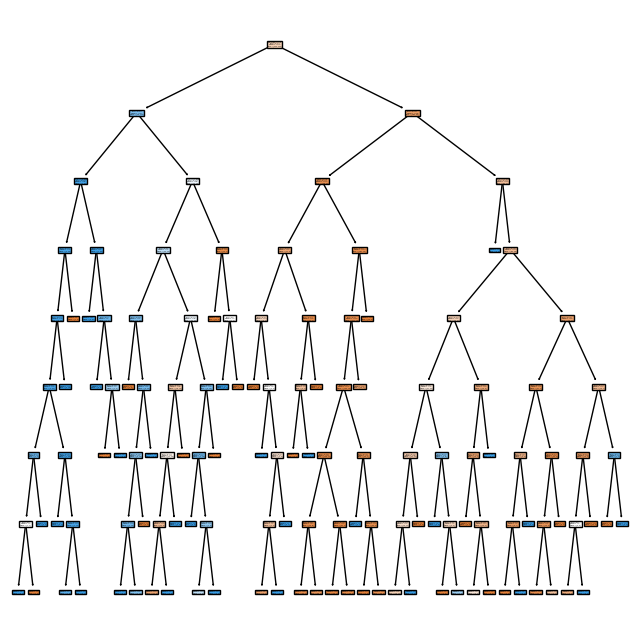

In [42]:
plt.figure(figsize=(8,8))
plot_tree(clf2, #our fitted object
         feature_names=X_train.columns, #puts in our features for the questions
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

6. Which model performs best on your out-of-sample data, the validate set?

In [43]:
# trying model 1 on validate set
clf.fit(X_validate, y_validate)

DecisionTreeClassifier()

In [44]:
clf.score(X_validate, y_validate)

0.9382022471910112

YUCK

In [45]:
# trying model 2 on validate set
clf2.fit(X_validate, y_validate)

DecisionTreeClassifier(max_depth=8)

In [46]:
clf2.score(X_validate, y_validate)

0.8876404494382022

YAY!

In [47]:
baseline_accuracy

61.61

## `Takeaways`

#### model 2 (clf2) is the best fit on the validate set with 83% accuracy beating the baseline of 62%.

> ## Part B: TELCO

>> ### Acquire

In [48]:
df = acq.get_telco_churn()
df.head()

csv file found and loaded


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


>> ### Prepare

In [49]:
dft = prep.clean_telco(df)

In [50]:
train, validate, test = prep.split_telco(dft)

In [51]:
#confimed sample sizes are 60/20/20
train.shape, validate.shape, test.shape

((4225, 28), (1409, 28), (1409, 28))

In [52]:
# ONLY LOOKING AT TRAIN
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5911,8319-QBEHW,1,0,0,1,26,0,0,0,1,...,One year,DSL,Bank transfer (automatic),1,0,0,0,0,0,0
2479,3547-LQRIK,0,0,1,0,47,1,1,0,0,...,One year,None,Electronic check,1,0,0,1,0,0,1
5889,8280-MQRQN,0,0,0,0,1,1,0,0,0,...,Month-to-month,DSL,Mailed check,0,0,0,0,1,0,0
6087,8626-PTQGE,1,0,0,0,69,0,0,1,1,...,Two year,DSL,Bank transfer (automatic),0,1,0,0,0,0,0
785,1142-IHLOO,0,0,0,0,51,1,0,0,0,...,One year,Fiber optic,Credit card (automatic),1,0,1,0,0,1,0


>> ### Explore

### CHECK NULLS!!!

In [53]:
train.isnull().sum(), validate.isnull().sum(), test.isnull().sum()

(customer_id                             0
 gender                                  0
 senior_citizen                          0
 partner                                 0
 dependents                              0
 tenure                                  0
 phone_service                           0
 multiple_lines                          0
 online_security                         0
 online_backup                           0
 device_protection                       0
 tech_support                            0
 streaming_tv                            0
 streaming_movies                        0
 paperless_billing                       0
 monthly_charges                         0
 total_charges                           9
 churn                                   0
 contract_type                           0
 internet_service_type                   0
 payment_type                            0
 contract_type_One year                  0
 contract_type_Two year                  0
 payment_ty

In [54]:
train.total_charges.fillna(0, inplace=True)
validate.total_charges.fillna(0, inplace=True)
test.total_charges.fillna(0, inplace=True)
# re run cell above to confirm NaN for total_charges (people who have been)
# with the company for less than one month) are replaced with a 0.

In [55]:
train.churn.value_counts()
# did not churn has higher counts = baseline prediction
train['baseline'] = 0

In [56]:
train.head() # checking to make sure baseline column was made

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None,baseline
5911,8319-QBEHW,1,0,0,1,26,0,0,0,1,...,DSL,Bank transfer (automatic),1,0,0,0,0,0,0,0
2479,3547-LQRIK,0,0,1,0,47,1,1,0,0,...,None,Electronic check,1,0,0,1,0,0,1,0
5889,8280-MQRQN,0,0,0,0,1,1,0,0,0,...,DSL,Mailed check,0,0,0,0,1,0,0,0
6087,8626-PTQGE,1,0,0,0,69,0,0,1,1,...,DSL,Bank transfer (automatic),0,1,0,0,0,0,0,0
785,1142-IHLOO,0,0,0,0,51,1,0,0,0,...,Fiber optic,Credit card (automatic),1,0,1,0,0,1,0,0


In [57]:
train.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [58]:
# establishing baseline accuracy
baseline_accuracy = round((3104/(1121+3104)*100),2)
baseline_accuracy

73.47

In [59]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None,baseline
5911,8319-QBEHW,1,0,0,1,26,0,0,0,1,...,DSL,Bank transfer (automatic),1,0,0,0,0,0,0,0
2479,3547-LQRIK,0,0,1,0,47,1,1,0,0,...,None,Electronic check,1,0,0,1,0,0,1,0
5889,8280-MQRQN,0,0,0,0,1,1,0,0,0,...,DSL,Mailed check,0,0,0,0,1,0,0,0
6087,8626-PTQGE,1,0,0,0,69,0,0,1,1,...,DSL,Bank transfer (automatic),0,1,0,0,0,0,0,0
785,1142-IHLOO,0,0,0,0,51,1,0,0,0,...,Fiber optic,Credit card (automatic),1,0,1,0,0,1,0,0


In [60]:
# I am trying to find the most significant categorical variables to send in

col_cat = []  #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns:
    print(col)#this is for my numeric variables
    if len(train[col].unique()) < 3: # making anything with less than 3 unique variables a categorical
        col_cat.append(col)
    else:
        col_num.append(col)

customer_id
gender
senior_citizen
partner
dependents
tenure
phone_service
multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
paperless_billing
monthly_charges
total_charges
churn
contract_type
internet_service_type
payment_type
contract_type_One year
contract_type_Two year
payment_type_Credit card (automatic)
payment_type_Electronic check
payment_type_Mailed check
internet_service_type_Fiber optic
internet_service_type_None
baseline


In [61]:
col_cat

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'baseline']

In [62]:
col_num

['customer_id',
 'tenure',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type']

## `Exploring Categoricals`

In [63]:
# pulling in takeaways from previous exploration

## `Exploring Numericals`

In [64]:
# pulling in takeaways from previous exploration

## `Takeaways`

Categorical Takeaways: 

* significant:
    * senior, partner, dependents, multiple lines, online security, online backup, device protection, tech support(), streaming tv, streaming movies, paperless billing(), contract type one year(), contract type two year(), payment type automatic, payment type electronic check(), payment type mailed check, internet service type fiber optic(), internet service type none()

* not significant:
    * gender, phone service

Numerical Takeaways:

* significant:
    * tenure(), total charges()

* not significant:
    * monthly charges

## `Selecting ALL Features (except target)`

In [65]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None,baseline
5911,8319-QBEHW,1,0,0,1,26,0,0,0,1,...,DSL,Bank transfer (automatic),1,0,0,0,0,0,0,0
2479,3547-LQRIK,0,0,1,0,47,1,1,0,0,...,None,Electronic check,1,0,0,1,0,0,1,0
5889,8280-MQRQN,0,0,0,0,1,1,0,0,0,...,DSL,Mailed check,0,0,0,0,1,0,0,0
6087,8626-PTQGE,1,0,0,0,69,0,0,1,1,...,DSL,Bank transfer (automatic),0,1,0,0,0,0,0,0
785,1142-IHLOO,0,0,0,0,51,1,0,0,0,...,Fiber optic,Credit card (automatic),1,0,1,0,0,1,0,0


In [66]:
train.columns.tolist()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'baseline']

In [109]:
# setting features (all numerical to go into the model)
X_train = train[[
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5911,1,0,0,1,26,0,0,0,1,0,...,1,39.95,1023.75,1,0,0,0,0,0,0
2479,0,0,1,0,47,1,1,0,0,0,...,0,26.90,1250.85,1,0,0,1,0,0,1
5889,0,0,0,0,1,1,0,0,0,1,...,1,50.45,50.45,0,0,0,0,1,0,0
6087,1,0,0,0,69,0,0,1,1,0,...,1,60.05,4176.70,0,1,0,0,0,0,0
785,0,0,0,0,51,1,0,0,0,0,...,0,87.55,4475.90,1,0,1,0,0,1,0


In [110]:
# setting validate and test variables
X_validate = validate[[
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
X_test = test[[
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]

In [111]:
# setting target variable
target = 'churn'

In [70]:
# create variable and verify that it is a series and one column
y_train = train[target]
y_train.head()

5911    0
2479    0
5889    1
6087    0
785     0
Name: churn, dtype: int64

In [71]:
# create for validate and test
y_validate = validate[target]
y_test = test[target]

In [72]:
X_validate.isnull().sum()

gender                                  0
senior_citizen                          0
partner                                 0
dependents                              0
tenure                                  0
phone_service                           0
multiple_lines                          0
online_security                         0
online_backup                           0
device_protection                       0
tech_support                            0
streaming_tv                            0
streaming_movies                        0
paperless_billing                       0
monthly_charges                         0
total_charges                           0
contract_type_One year                  0
contract_type_Two year                  0
payment_type_Credit card (automatic)    0
payment_type_Electronic check           0
payment_type_Mailed check               0
internet_service_type_Fiber optic       0
internet_service_type_None              0
dtype: int64

## `Make the Object`

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [73]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [74]:
# fitting training data to model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
# transforming the model
clf.score(X_train, y_train)

0.9981065088757396

## `Takeaways`

* 99.8% accurate -- FISHY

3. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [76]:
# run classification report and confusion matrix!

In [77]:
#find labels in our dataset & sort
labels = sorted(y_train.unique())
labels

[0, 1]

In [78]:
# get y_pred values
clf.predict(X_train)[:5]

array([0, 0, 1, 0, 0])

In [79]:
# create y_pred variable
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 1, 0, 0])

In [80]:
confusion_matrix(y_train, y_pred)

array([[3103,    1],
       [   7, 1114]])

In [81]:
#make pretty with df
pd.DataFrame(confusion_matrix(y_train, y_pred),
            index=labels,
            columns=labels)

,0,1
0,3103,1
1,7,1114


In [82]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



>>> ## Terrible model...

4. Run through steps 2-4 using a different max_depth value.

    * going to remove columns to prevent over fitting the model and setting max_depth to 5.

Categorical Takeaways: 

* significant:
    * senior, partner, dependents, multiple lines, online security, online backup, device protection, tech support(), streaming tv, streaming movies, paperless billing(), contract type one year(), contract type two year(), payment type automatic, payment type electronic check(), payment type mailed check, internet service type fiber optic(), internet service type none()

* not significant:
    * gender, phone service

Numerical Takeaways:

* significant:
    * tenure(), total charges()

* not significant:
    * monthly charges (deemed to be sig)

In [83]:
X_train.columns.tolist()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']

In [84]:
# model isn't changing from 100% accuracy so I need to eliminate features
# see above to eliminate and apply to all sets
X_train = train[[
 'partner',
 'dependents',
 'tenure',
 'tech_support',
 'paperless_billing',
 'total_charges',
 'monthly_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
X_validate = validate[[
 'partner',
 'dependents',
 'tenure',
 'tech_support',
 'paperless_billing',
 'total_charges',
 'monthly_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
X_test = test[[
 'partner',
 'dependents',
 'tenure',
 'tech_support',
 'paperless_billing',
 'total_charges',
 'monthly_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [85]:
clf2 = DecisionTreeClassifier(max_depth=5)

In [86]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [87]:
clf2.score(X_train, y_train)

0.8035502958579882

In [88]:
baseline_accuracy

73.47

#### `Changed from 99.8% to 80%!!!! model 2 is looking promising and beating baseline accuracy of 73.5%`

5. Which model performs better on your in-sample data?

    * model 2 (clf2!)

6. Which model performs best on your out-of-sample data, the validate set?

In [89]:
# trying model 1 on validate set
clf.fit(X_validate, y_validate)

DecisionTreeClassifier()

In [90]:
clf.score(X_validate, y_validate)

1.0

YUCK

In [91]:
# trying model 2 on validate set
clf2.fit(X_validate, y_validate)

DecisionTreeClassifier(max_depth=5)

In [92]:
clf2.score(X_validate, y_validate)

0.8211497515968772

YAY!

In [93]:
baseline_accuracy

73.47

## `Takeaways`

#### model 2 (clf2) is the best fit on the validate set with 82% accuracy beating the baseline of 73.5%.

#### playing around (see below) model 3 (clf3) is a better fit with 96% accuracy beating the baseline of 73.5% and the train accuracy rate of 90%.

    * I achieved this by limiting the features and expanding the depth

Test model that has tech support, internet type, contract type and tenure

In [94]:
train.columns.tolist()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'baseline']

In [95]:
X_train1 = train[['tech_support',
                  'internet_service_type_Fiber optic',
                  'tenure',
                  'contract_type_One year',
                  'total_charges']]

In [96]:
X_validate1 = validate[['tech_support',
                  'internet_service_type_Fiber optic',
                  'tenure',
                  'contract_type_One year',
                  'total_charges']]
X_test1 = test[['tech_support',
                  'internet_service_type_Fiber optic',
                  'tenure',
                  'contract_type_One year',
                  'total_charges']]
y_train1 = train[target]
y_validate1 = validate[target]
y_test1 = test[target]

In [97]:
X_train1

,tech_support,internet_service_type_Fiber optic,tenure,contract_type_One year,total_charges
5911,0,0,26,1,1023.75
2479,0,0,47,1,1250.85
5889,0,0,1,0,50.45
6087,1,0,69,0,4176.70
785,0,1,51,1,4475.90
...,...,...,...,...,...
6102,0,1,2,0,165.00
356,1,0,52,0,2566.30
1756,0,1,4,0,237.95
2127,0,0,35,0,1924.10


In [98]:
clf3 = DecisionTreeClassifier(max_depth=13)

In [99]:
clf3.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=13)

In [100]:
clf3.score(X_train1, y_train1)

0.8996449704142012

In [101]:
clf3.fit(X_validate1, y_validate1)

DecisionTreeClassifier(max_depth=13)

In [102]:
clf3.score(X_validate1, y_validate1)

0.9581263307310149

In [103]:
y_pred = clf3.predict(X_validate1)
y_pred[:5]

array([0, 0, 1, 0, 1])

In [104]:
confusion_matrix(y_validate1, y_pred)

array([[1015,   20],
       [  39,  335]])

In [105]:
pd.DataFrame(confusion_matrix(y_validate1, y_pred))

,0,1
0,1015,20
1,39,335


In [106]:
print(classification_report(y_validate1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1035
           1       0.94      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



## `Takeaways`

#### model 2 (clf2) is the best fit on the validate set with 82% accuracy beating the baseline of 73.5%.

#### playing around (see below) model 3 (clf3) is a better fit with 96% accuracy beating the baseline of 73.5% and the train accuracy rate of 90%.

    * I achieved this by limiting the features and expanding the depth

`Testing Area for Functions`

In [121]:
def classifier_tree_eval(df, target, X_train, y_train, X_validate, y_validate):
    ''' This function is to calculate the best classifier decision tree model by running 
    a for loop to explore the max depth per default range (1,20).

    The loop then makes a list of lists of all max depth calculations, compares the
    accuracy between train and validate sets, turns to df, and adds a new column named
    difference. The function then calculates the baseline accuracy and plots the
    baseline, and the train and validate sets to identify where overfitting occurs.

    Requires:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    '''
    scores_all=[]
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    import warnings
    warnings.filterwarnings("ignore")
    for x in range(1,20):
        tree = DecisionTreeClassifier(max_depth=x)
        tree.fit(X_train, y_train)
        train_acc = tree.score(X_train, y_train)
        print(f"For depth of {x:2}, the accuracy is {round(train_acc,2)}")
        
        # evaludate on validate set
        validate_acc = tree.score(X_validate, y_validate)

        # append to df scores_all
        scores_all.append([x, train_acc, validate_acc])

        # turn to df
        scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'validate_acc'])

        # make new column
        scores_df['difference'] = scores_df.train_acc - scores_df.validate_acc

        # sort on difference
        scores_df.sort_values('difference')

        # establish baseline accuracy
    baseline_accuracy = ((df[{target}].value_counts().max()) /\
                         (df[{target}].value_counts().sum()))
    print()
    print(f'The baseline accuracy is {round(baseline_accuracy,2)}')
          
        # can plot to visulaize
    plt.figure(figsize=(12,8))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.validate_acc, label='validate', marker='o')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xlabel('Max Depth for Decision Tree')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,20, step=1))
    plt.title('Where do I begin to overfit?')
    plt.legend()
    plt.show()

# select a model before the split of the two graphs. A large split indicates overfitting
# when selecing the depth to run with select the point where the difference between
# the train and validate set is the smallest before they seperate.

For depth of  1, the accuracy is 0.73
For depth of  2, the accuracy is 0.79
For depth of  3, the accuracy is 0.79
For depth of  4, the accuracy is 0.79
For depth of  5, the accuracy is 0.8
For depth of  6, the accuracy is 0.81
For depth of  7, the accuracy is 0.82
For depth of  8, the accuracy is 0.84
For depth of  9, the accuracy is 0.86
For depth of 10, the accuracy is 0.88
For depth of 11, the accuracy is 0.91
For depth of 12, the accuracy is 0.93
For depth of 13, the accuracy is 0.95
For depth of 14, the accuracy is 0.96
For depth of 15, the accuracy is 0.98
For depth of 16, the accuracy is 0.98
For depth of 17, the accuracy is 0.99
For depth of 18, the accuracy is 0.99
For depth of 19, the accuracy is 0.99

The baseline accuracy is 0.73


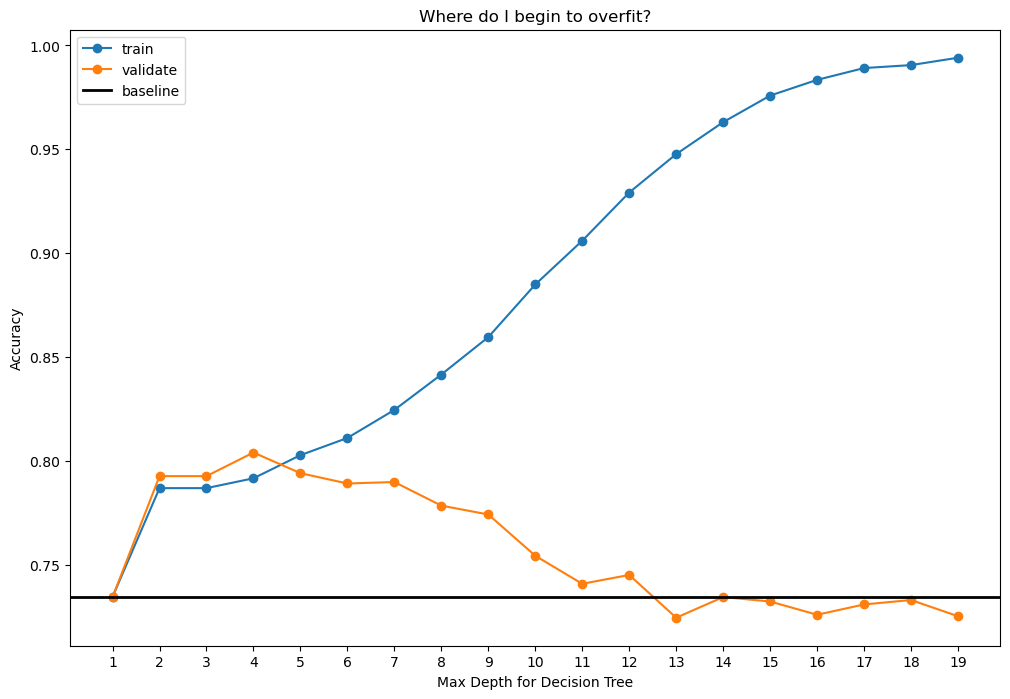

In [122]:
classifier_tree_eval(train, 'churn', X_train, y_train, X_validate, y_validate)

In [150]:
def random_forest_eval(X_train, y_train, X_validate, y_validate):
    ''' This function is to calculate the best random forest decision tree model by running 
    a for loop to explore the max depth per default range (1,20).

    The loop then makes a list of lists of all max depth calculations, compares the
    accuracy between train and validate sets, turns to df, and adds a new column named
    difference. The function then calculates the baseline accuracy and plots the
    baseline, and the train and validate sets to identify where overfitting occurs.
    '''
    scores_all=[]

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    import warnings
    warnings.filterwarnings("ignore")

    for x in range(1,11):
        rf = RandomForestClassifier(random_state = 123,max_depth = x)
        rf.fit(X_train, y_train)
        train_acc = rf.score(X_train, y_train)
        print(f"For depth of {x:2}, the accuracy is {round(train_acc,2)}")
        
        # establish feature importance variable
        important_features = rf.feature_importances_
        
        # evaluate on validate set
        validate_acc = rf.score(X_validate, y_validate)

        # append to df scores_all
        scores_all.append([x, train_acc, validate_acc])

        # turn to df
        scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'validate_acc'])

        # make new column
        scores_df['difference'] = scores_df.train_acc - scores_df.validate_acc

        # sort on difference
        scores_df.sort_values('difference')

        # establish baseline accuracy
    baseline_accuracy = (y_train == 0).mean()
    print()
    print(f'The baseline accuracy is {round(baseline_accuracy,2)}')
          
        # plot to visulaize train and validate accuracies for best fit
    plt.figure(figsize=(12,8))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.validate_acc, label='validate', marker='o')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xlabel('Max Depth for Random Forest')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,11, step=1))
    plt.title('Where do I begin to overfit?')
    plt.legend()
    plt.show()
    
        # plot feature importance
    plt.figure(figsize=(12,12))
    plt.bar(X_train.columns, important_features)
    plt.xticks(rotation = 60)
    plt.show()    

For depth of  1, the accuracy is 0.73
For depth of  2, the accuracy is 0.76
For depth of  3, the accuracy is 0.78
For depth of  4, the accuracy is 0.79
For depth of  5, the accuracy is 0.8
For depth of  6, the accuracy is 0.81
For depth of  7, the accuracy is 0.83
For depth of  8, the accuracy is 0.84
For depth of  9, the accuracy is 0.86
For depth of 10, the accuracy is 0.89

The baseline accuracy is 0.73


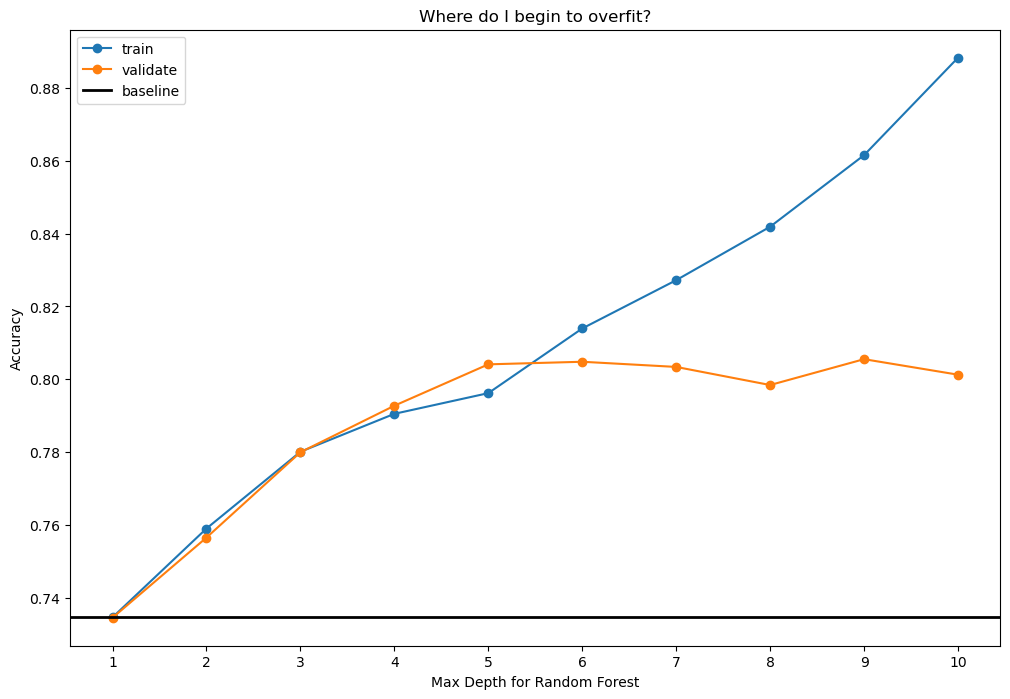

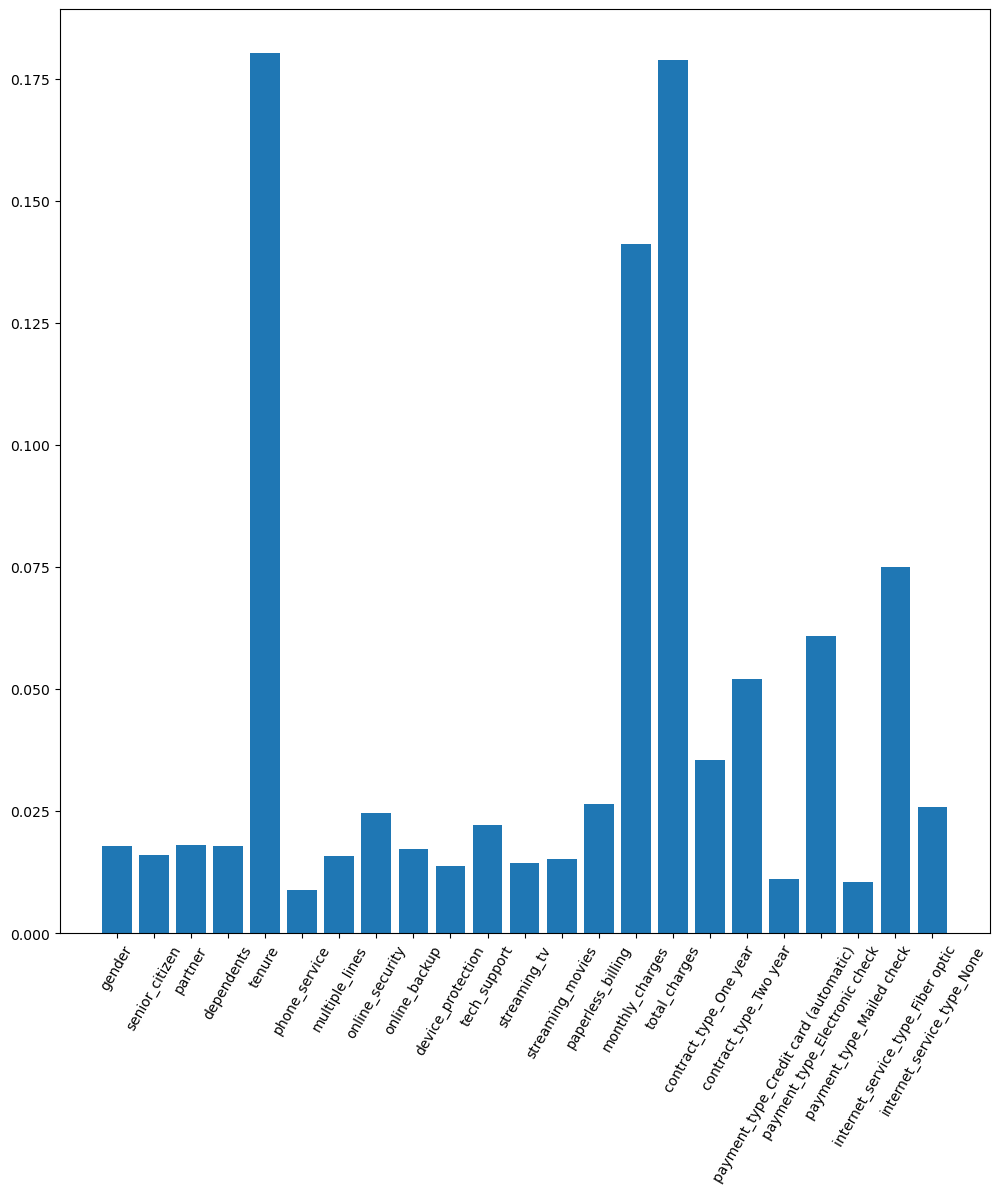

In [151]:
random_forest_eval(X_train, y_train, X_validate, y_validate)